In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import random

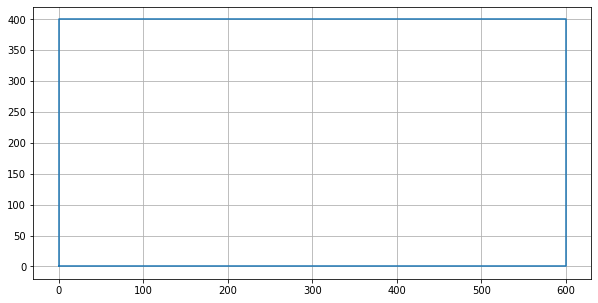

In [2]:
size_pazzle = (600, 400)

plt.figure(figsize=(10, 5))
plt.plot([0, 0, size_pazzle[0], size_pazzle[0], 0],
         [0, size_pazzle[1], size_pazzle[1], 0, 0])
plt.grid()
plt.show()

In [59]:
class Pentagon:
    def __init__(self, direction: set, center: set, radius: int, n_angles: int = 5):
        self.direction = self._norm_vector(direction)
        self.center = np.array(center)
        self.radius = radius
        self.n_angles = n_angles
        
    @staticmethod
    def _norm_vector(vector):
        vector = np.array(vector)
        normed_vector = vector / np.sqrt(np.sum(vector**2))
        return normed_vector
        
    def _get_rm(self, alpha):
        alpha = np.deg2rad(alpha)
        rot_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                              [np.sin(alpha), np.cos(alpha)]])
        return rot_matrix
    
    def get_points(self, curr_dirr = None, curr_length = None): 
        points = []
        curr_dirr = self.direction if curr_dirr is None else curr_dirr
        curr_length = self.radius  if curr_length is None else curr_length
        
        for i in range(1, self.n_angles+1):
            angle = int(360/self.n_angles)*i
            rot_matrix = self._get_rm(alpha=angle)
            new_dir = rot_matrix@curr_dirr
            new_edge = self.center + new_dir*curr_length
            points.append(new_edge)
        return np.array(points)
    
    def get_neares_centers(self):
#         half_angle = 360/self.n_angles/2
#         length_line = np.cos(np.deg2rad(half_angle))*self.radius
#         dir_new_center = self._get_rm(half_angle)@self.direction

        length_line = self.radius
        dir_new_center = self.direction
        neares_centers = self.get_points(curr_dirr=dir_new_center, 
                                         curr_length=length_line*2)
        return neares_centers
        

RADIUS = 1
pent = Pentagon(direction=-np.array((0, 1)),
                center=(0, 0),
                radius=RADIUS
               )
points = pent.get_points()
points = np.vstack((points, points[0, :].T))

neares_centers = pent.get_neares_centers()

directions = neares_centers + pent.center
pents = [
    Pentagon(direction=-direct, center=c, radius=RADIUS)
    for direct, c in zip(directions, neares_centers)
]

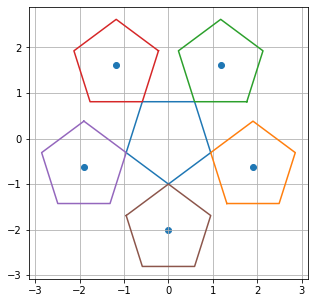

In [60]:
plt.figure(figsize=(5, 5))
plt.plot(points[:, 0], points[:, 1])

for pent in pents:
    pent_points = pent.get_points()
    pent_ = np.vstack((pent_points, pent_points[0, :].T))
    plt.plot(pent_[:, 0], pent_[:, 1])

plt.scatter(neares_centers[:, 0], neares_centers[:, 1])
plt.grid()
plt.show()